# Pymaceuticals Data Analysis Report
### Completed by: Lauren Stein

## Key Findings

* Capomulin is one of the most effective drugs at reducing average tumor volume


* Ramicane was just as effective at Capomulin at reducing tumor volume


* Study was evenly split between male and female mice


* There was a strong positive correlation between mouse body weight and average tumor volume in the Capomulin-treated group

## Important Considerations

* Tumor volume was not recorded for 45 days for all of the mice/drug regimens included in this analysis.


* Age of the mice included in this analysis ranged from 1 month to 2 years. (Age was not controlled for)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../Pymaceuticals_data_directory/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals_data_directory/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [2]:
dup_mice = df.loc[df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
#Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
df = df.loc[df["Mouse ID"] != "g989"]

#Total number of mice
total_mice = df["Mouse ID"].nunique()
print(f"There are a total of {total_mice} mice in this dataset")

There are a total of 248 mice in this dataset


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
rx_df = df.groupby(["Drug Regimen"])
tum_mean = round(rx_df["Tumor Volume (mm3)"].mean(),2)
tum_median = round(rx_df["Tumor Volume (mm3)"].median(),2)
tum_var = round(rx_df["Tumor Volume (mm3)"].var(),2)
tum_sd = round(rx_df["Tumor Volume (mm3)"].std(),2)
tum_sem = round(rx_df["Tumor Volume (mm3)"].sem(),2)

tumor_summary_df = pd.DataFrame({"Mean": tum_mean, 
                            "Median":tum_median,
                            "Variance": tum_var,
                            "Std Dev": tum_sd,
                            "SEM": tum_sem
                           }).reset_index()
tumor_summary_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
3,Ketapril,55.24,53.70,68.55,8.28,0.60
4,Naftisol,54.33,52.51,66.17,8.13,0.60
5,Placebo,54.03,52.29,61.17,7.82,0.58
6,Propriva,52.32,50.45,43.85,6.62,0.54
7,Ramicane,40.22,40.67,23.49,4.85,0.32
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
9,Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar and Pie Charts

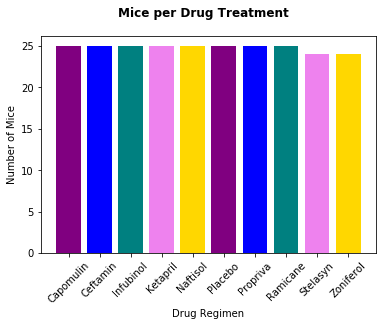

In [5]:
#Using rx_df grouped by Drug Regimen, count number of mice per treatment
df2 = df.groupby(['Drug Regimen','Mouse ID']).count().reset_index()
mice_y= df2["Drug Regimen"].value_counts()
rx_x = tumor_summary_df["Drug Regimen"]


#Add labels and show
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.suptitle("Mice per Drug Treatment",
            fontweight="bold")
plt.xticks(rotation="45")

#Create bar graph using pyplot
plt.bar(rx_x, mice_y, color=("purple", "blue", "teal", "violet", "gold"))

plt.show()

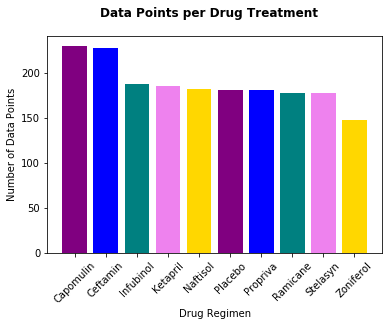

In [6]:
#Using datpoints per Drug Treatment
mice_y= df["Drug Regimen"].value_counts()
rx_x = tumor_summary_df["Drug Regimen"]


#Create bar graph using pyplot
plt.bar(rx_x, mice_y, color=("purple", "blue", "teal", "violet", "gold"))

#Add labels and show
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.suptitle("Data Points per Drug Treatment",
            fontweight="bold")
plt.xticks(rotation="45")

plt.show()

/Users/laurenstein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


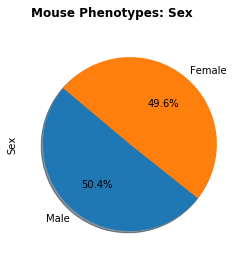

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create a group by object
mouse_id = df.groupby("Mouse ID")["Mouse ID", "Sex"].max()

#Perform function for calculation of interest
count_sex = mouse_id["Sex"].value_counts()

count_sex.plot(kind='pie', 
           autopct="%1.1f%%", 
           shadow=True, 
           startangle=140, 
           figsize=(20,4))

#Add title
plt.suptitle("Mouse Phenotypes: Sex",
            fontweight="bold")
plt.show()

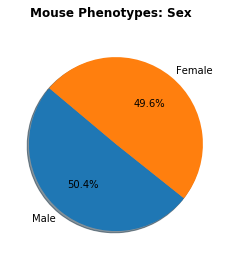

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(count_sex,
        labels = labels,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

#Add Title
plt.suptitle("Mouse Phenotypes: Sex",
            fontweight="bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df.sort_values(by=["Timepoint"], ascending= False)

#Drop duplicates
df2 = df.drop_duplicates(subset="Mouse ID", keep="last")

In [10]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tum_vol = df2.loc[df2["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_list.append(tum_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tum_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"Tumor Volume Quartile Range For: {drug}")
    print("===============================================")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Median: {quartiles[0.5]}")
    print(" ")

Tumor Volume Quartile Range For: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Median: 38.125164399999996
 
Tumor Volume Quartile Range For: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Median: 36.56165229
 
Tumor Volume Quartile Range For: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Median: 60.16518046
 
Tumor Volume Quartile Range For: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Median: 59.85195552
 


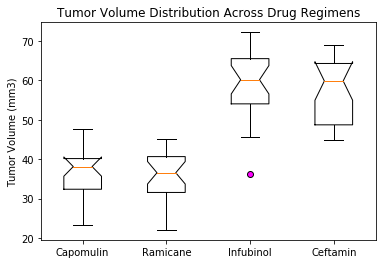

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
pink_circle = dict(markerfacecolor='magenta', marker='o')
fig1, ax1 = plt.subplots()

ax1.set_title("Tumor Volume Distribution Across Drug Regimens")
ax1.boxplot(tumor_list, 
            notch=True, 
            flierprops=pink_circle)

plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

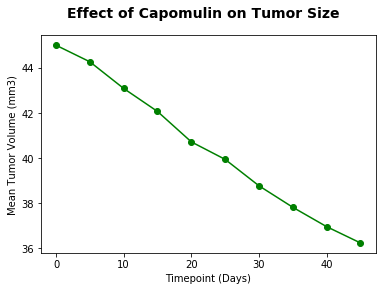

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = df.loc[df["Drug Regimen"] == "Capomulin"]
y_axis = cap_df.groupby("Timepoint").mean()["Tumor Volume (mm3)"]
x_axis = cap_df.groupby("Timepoint").count().reset_index()["Timepoint"]

plt.xlabel("Timepoint (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.suptitle("Effect of Capomulin on Tumor Size", 
             fontsize = 14,
            fontweight="bold")

plt.plot(x_axis, y_axis, marker = "o", color = "green")
plt.show()

In [13]:
#Create subset of data for Capomulin only
cap_df = df2.loc[df2["Drug Regimen"] == "Capomulin"]
cap_mouseids = [mouse for mouse in cap_df["Mouse ID"]]

# Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse.
print(f"Mouse IDs treated with Capomulin: {cap_mouseids}")
print("==========================================================================================")
mouse_id = input("Enter the Capomulin-treated Mouse ID to view tumor volume across treatment: ")

Mouse IDs treated with Capomulin: ['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157']
Enter the Capomulin-treated Mouse ID to view tumor volume across treatment: r157


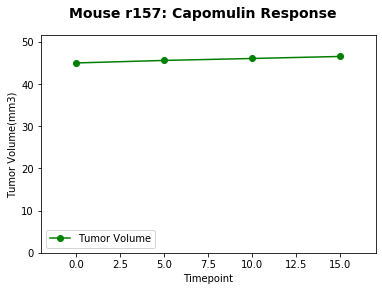

In [14]:
#Create series to look for Mouse ID and return tumor volume across treatment
selected_mouse = df.loc[df["Mouse ID"] == mouse_id][["Timepoint", "Tumor Volume (mm3)"]]
x_axis = selected_mouse["Timepoint"]
y_axis = selected_mouse["Tumor Volume (mm3)"]

#Pyplot line plot
plt.plot(x_axis, y_axis, color="green", label = "Tumor Volume", marker="o")

#Graph formatting
plt.suptitle("Mouse " + mouse_id + ": Capomulin Response",
             fontsize = 14,
            fontweight="bold")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")
plt.ylim(0,(y_axis.max()+5))
plt.xlim(0-2, (x_axis.max()+2))
plt.legend(loc="lower left")

plt.show()

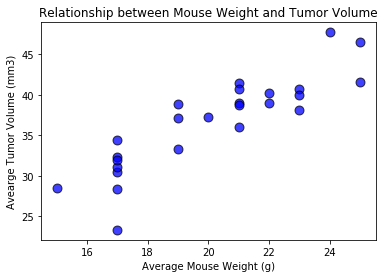

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = cap_df.groupby("Mouse ID").mean()["Weight (g)"]
tumor_volume = cap_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

#Plot graph
plt.scatter(mouse_weight, 
            tumor_volume, 
            marker="o", 
            facecolors="blue", 
            edgecolors="black", 
            s=80, alpha=0.75)

#Graph formatting
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Avearge Tumor Volume (mm3)")
plt.title("Relationship between Mouse Weight and Tumor Volume")

plt.show()

## Correlation and Regression

In [16]:
correlation = sts.pearsonr(mouse_weight, tumor_volume)
print(f"The correlation between mouse body weight and tumor volume is {round(correlation[0],2)}")

The correlation between mouse body weight and tumor volume is 0.88


The r-squared is: 0.7686134812139006


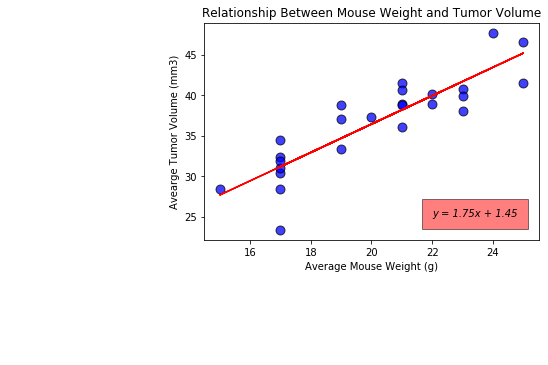

In [17]:
mouse_weight = cap_df.groupby("Mouse ID").mean()["Weight (g)"]
tumor_volume = cap_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]


#slope calculations
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.text(22,25, line_eq, 
         style='italic',
         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.scatter(mouse_weight, tumor_volume, marker="o", facecolors="blue", edgecolors="black", s=80, alpha=0.75)
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(8,8),fontsize=15,color="green")

plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Avearge Tumor Volume (mm3)")
plt.title("Relationship Between Mouse Weight and Tumor Volume")


print(f"The r-squared is: {rvalue**2}")
plt.show()